<a href="https://colab.research.google.com/github/Hertie-School-Machine-Learning-F2022/Class_lab_05/blob/main/Notes_Lab_05_GRAD_C24_fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Author: Paulina Garcia Corral

Regression is a method of modelling a target value (y) based on independent values. In plain english, predicting the value of some variable y, based on the values of other variables we think influence it. Regression techniques differ on number of independent variables (linear regression, multilinear regression) and on the type of relationship between target and predictors (polynomials).

## Simple linear regression

The relationship between one independent variable (x) and one dependent variable (y). The modelling produces a straight line of best fit, which models the points using the linear equation (y = mx + b).

In statistics, the linear equation is usually expressed as: 

## y' = β0 + β1*X1 + e

With a bigger number of independent variables, or a model that has multiple _features_ (x1, x2, etc), each with a different weight (b_1, b_2, etc) the equation expands like this:

## y' = β0 + β1*X1 + β2*X2 + β3*X3 + βi*Xi + 𝜀

Look at the example below: 

We have recorded the temperature in Celsius each day and the number of cricket chirps. 

We want to find out if the temperature influences the number of chirps. 

We set X as our independent variable (Temperature in ºC) 

and y as our dependent variable (Number of chirps)

Y' = -4.11 + 0.65 *X1


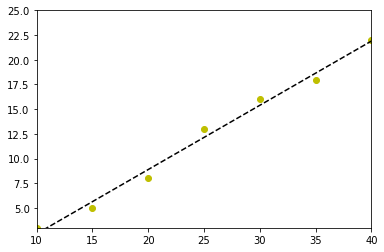

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [10, 15, 20, 25, 30, 35, 40]
y = [3, 5, 8, 13, 16, 18, 22]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k');

plt.xlim(10, 40);
plt.ylim(3, 25);

print("Y' =", "%.2f" % coef[1], '+', "%.2f" % coef[0], '*X1')

The purpose of linear regression in Machine Learning is to use the line of best fit, to estimate the values of unseen data samples.

For example, using the estimator, when the temprature is equal to 23ºC (x = 23), we estimate to hear aprox 11 chirps (y' = 10.84).

In [ ]:
print('Equation')
print("Y' =", "%.2f" % coef[1], '+', "%.2f" % coef[0], '*X1')
print("Y' =", "%.2f" % coef[1], '+', "%.2f" % coef[0], '*Temp')
print("")
print('Substitute')
print("y' =", "%.2f" % coef[1], '+', "%.2f" % coef[0], '*23ºC')
print("y' =", "%.2f" % (coef[1] + (coef[0]*23)))

Equation
Y' = -4.11 + 0.65 *X1
Y' = -4.11 + 0.65 *Temp

Substitute
y' = -4.11 + 0.65 *23ºC
y' = 10.84


## Linear regression is a minimization problem

The objetive is to minimize the error between the predicted value and the actual value.

What do we mean by this? 

Let's look at our real data:

x = [10, 15, 20, 25, 30, 35, 40]

y = [3, 5, 8, 13, 16, 18, 22]


Take the actual value of x = 15, we _know_ the real value of y =5 when x = 15. 

But using the equation above, we estimate that the value of y' = 5.64

In [ ]:
print('Equation')
print("y' =", "%.2f" % coef[1], '+', "%.2f" % coef[0], '*x_1')
print("")
print('Substitute')
print("y' =", "%.2f" % coef[1], '+', "%.2f" % coef[0], '*15')
print("y' =", "%.2f" % (coef[1] + (coef[0]*15)))

Equation
y' = -4.11 + 0.65 *x_1

Substitute
y' = -4.11 + 0.65 *15
y' = 5.64


The objetive of linear regression is to minimize the difference between the real value and the predict value as much as we can, to generate better predictions. 

In a Linear Regression model, training or fitting a model simply means determining or finding good values for all the weights (the b's for each x) and the bias (B0 or coefficient) from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss, or the difference between actual and predicted value (y - y').

In linear regression models one loss function used to calculate the weights is called squared loss (also known as L2 loss). The squared loss for a single example is as follows: 


 Mean Squared Error = (Σ(y - prediction(x))^2)/N

In [ ]:
# This looks familiar, many results metrics take this form!

from sklearn.metrics import mean_squared_error

mse_results = mean_squared_error(y_test, y_pred) #y_test is the actual value of y that is saved in our test set
                                                 #y_pred is the predicted value of y according to our model

Let's keep using the temprature and cricket chirping example to further demostrate. 

In [ ]:
# Imagine that we have a bigger dataset, and we have divided that set into testing
# and training, like below. 
# (For sklearn, the dimensions of the arrey have to be in 2D, set as -1,1)

X_train = np.reshape([10, 15, 20, 25, 30, 35, 40], (-1, 1))
y_train = np.reshape([3, 5, 8, 13, 16, 18, 22], (-1, 1))

X_test = np.reshape([13, 14, 15, 16], (-1,1))
y_test = np.reshape([3, 5, 5, 7], (-1, 1))

In [ ]:
# Import Linear Regression from linear_model
from sklearn.linear_model import LinearRegression

# Set Linear Regression as our model (lm)

lm = LinearRegression()

# Fit with the training set, which in this case means calculating the line of best fit
# and obtaining the bias and weights (B0 and Bi or intercept and coefficients or alpha and beta i)

lm_fit = lm.fit(X_train, y_train)

print('bias or intercept', lm_fit.intercept_)
print('weight or coef',lm_fit.coef_)

bias or intercept [-4.10714286]
weight or coef [[0.65]]


## Recall our test data

**x = 13, 14, 15, 16**

**y = 3, 5, 5, 7**

What happens now is that the model will take the X values, and predict y using the equation that was fitted above using the bias and the weight.

_y' = -4.107 + 0.65*Temp_


In [ ]:
# Of course, that's when our sklearn functions come in
# We can now predict on unseen data!

y_pred = lm_fit.predict(X_test)
y_pred

array([[4.34285714],
       [4.99285714],
       [5.64285714],
       [6.29285714]])

In [ ]:
# We can compare the real values of y (y_test) and the predicted values of y (y_pred)

print('y_test:')
print(y_test)
print("")
print('y_pred:')
print(y_pred)


y_test:
[[3]
 [5]
 [5]
 [7]]

y_pred:
[[4.34285714]
 [4.99285714]
 [5.64285714]
 [6.29285714]]


In [ ]:
# Calculate the mean squared error 

mean_squared_error(y_test, y_pred)

0.6791581632653041

In [ ]:
# and the R^2 as an additional metric 

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.660420918367348

Both MSE and R2 quantify how well a regression model fits a dataset. The RMSE tells us how well a regression model can predict the value of the response variable in absolute terms while R2 tells us how well a model can predict the value of the response variable in percentage terms

## How can we interpret the results? 

**bias and weights**

**bias**: mean value of y' when X are equal to zero. In this case, when X = 0, we would hear -4.1 chirps. It makes no sense, so there is no interpretation, as it is impossible to hear negative chirps. However, we need this intercept for the model.

**weights**: in average how much y increases by each unit increase of x. 0.65 extra chirps per ºC. 

MSE and R^2

**MSE**: measures how close a regression line is to a set of data points

**R^2**: tells us how much variance is explained by the model

## Now let's apply a full pipeline!

For this excercise I'm adapting Will Lowe's linear regression Percept 7 and 8 lab in R for Python.

We will use The Electric Company on children's reading ability, an experiment by Cooney (1976). 

In [ ]:
# Load the dataset called electric-company.csv

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['electric-company.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving electric-company.csv to electric-company (1).csv


This experiment tried to measure if watching an educational tv program helped students improve their reading. Every observation is a class of students, which was either treated, if the program was shown to them, or control if the program was not shown as part of their studies.

The outcome of interest, our ‘dependent variable’, is the class’s average score on a reading test at the end of the year. We’ve called that post.score.

In [ ]:
# What does the data look like 

df.head()

# City: Fresno (F) or Youngstown (Y)
# Grade: School grade 1-4
# Supp: Wheter the program replaced (R) or supplemented (S) a reading activity
# Treatment: T if the children recieved treatment or C otherwise
# Pre.score: Reading score before treatment
# Post.score: Reading score after treatment

,pair,city,grade,supp,treatment,pre.score,post.score
0,1,F,1,S,T,13.8,48.9
1,2,F,1,R,T,16.5,70.5
2,3,F,1,S,T,18.5,89.7
3,4,F,1,R,T,8.8,44.2
4,5,F,1,S,T,15.3,77.5


In [ ]:
df.dtypes

pair            int64
city           object
grade           int64
supp           object
treatment      object
pre.score     float64
post.score    float64
dtype: object

We will not focus on the experiment for now, and only look at the children's scores in total (both T and C).

coef: [[12.32557903]]
intercept: [67.23427173]
R2: 0.5421947957690019


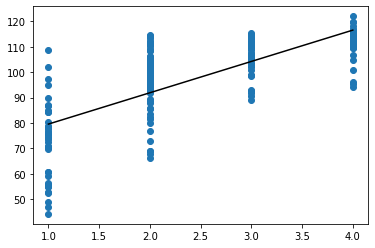

In [ ]:
# Let's do a simple linear regression.
# We will attempt to predict readings score based on school grade

x = df[['grade']]
y = df[['post.score']]

lm = LinearRegression()
y_pred = lm.fit(x,y).predict(x)

print("coef:", lm.coef_)
print("intercept:", lm.intercept_)
print("R2:", r2_score(y, y_pred))

plt.scatter(x, y) 
plt.plot(x, y_pred, color='k');

Above, we are only considering that given a child's school grade, we can predict it's learning score.

We see that according to the model, every extra year of schooling, increases the score by 12.32 points.

In [ ]:
# Two variables to observe if this increases the variance explained

x = df[['grade', 'pre.score']] # Add the previous score
y = df[['post.score']]

y_pred = lm.fit(x,y).predict(x)

print("coef:", lm.coef_)
print("intercept:", lm.intercept_)
print("R2:", r2_score(y, y_pred))

coef: [[-3.60451442  0.56196953]]
intercept: [65.30997947]
R2: 0.7895755360654055


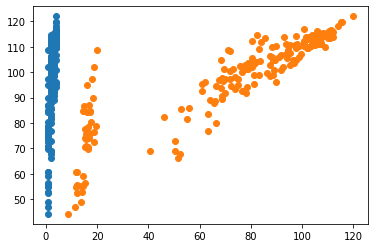

In [ ]:
# Plot
plt.scatter(df["grade"], y)
plt.scatter(df["pre.score"], y)
plt.show()

In [ ]:
# Fit lm

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
lm = LinearRegression()

pipe = Pipeline([
    ('preproc', stdsc),
    ('model', lm)
    ])

y_pred = pipe.fit(x,y).predict(x)

print("coef:", pipe['model'].coef_)
print("intercept:", pipe['model'].intercept_)
print("R2:", r2_score(y, y_pred))

coef: [[-3.81411989 19.01972909]]
intercept: [97.14947917]
R2: 0.7895755360654055


What if we add an interaction term? There are advantages to understanding the effects of variables that together have more predictive power.

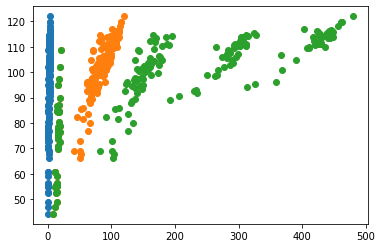

In [ ]:
# We can add more variables to observe if this increases the variance explained
xy = df['grade'] * df['pre.score']
df['grade*pre'] = xy

x = df[['grade', 'pre.score', 'grade*pre']] # Add the previous score
y = df[['post.score']]

# Plot

plt.scatter(df["grade"], y)
plt.scatter(df["pre.score"], y)
plt.scatter((df['grade*pre']), y)
plt.show()

In [ ]:
# Fit linear regression with 3 variables 
pipe = Pipeline([
    ('preproc', stdsc),
    ('model', lm)
    ])

y_pred = pipe.fit(x,y).predict(x)

print("coef:", pipe['model'].coef_)
print("intercept:", pipe['model'].intercept_)
print("R2:", r2_score(y, y_pred))

coef: [[-16.65000206  15.91330947  15.8351307 ]]
intercept: [97.14947917]
R2: 0.8076317778862447


It is clear from the data that the classess are grouping together, and that they should probably be treated as categorical instead of numerical.

In [ ]:
## Change grade to be categorical?

x = df[['grade', 'pre.score', 'grade*pre']] # Add the previous score
y = df[['post.score']]

# We need to use one hot encoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

# We drop our first dummy to make it easier to interpret
ohe = OneHotEncoder(drop = 'first')

# Preprocess 

col_t = make_column_transformer(
    (ohe, ['grade']),
    remainder = StandardScaler())


# Create a pipeline

pipe = Pipeline([
    ('preproc', col_t),
    ('model', lm)
    ])

# Fit
y_pred = pipe.fit(x,y).predict(x)

# Get the values  
print('Feat:', col_t.get_feature_names_out())
print('Coef:', pipe['model'].coef_)
print('Inter:', pipe['model'].intercept_)
print("R2:", r2_score(y, y_pred))

Feat: ['onehotencoder__grade_2' 'onehotencoder__grade_3'
 'onehotencoder__grade_4' 'remainder__pre.score' 'remainder__grade*pre']
Coef: [[-26.73540452 -16.22488882   6.03441299  47.71607257 -33.72457626]]
Inter: [108.6784256]
R2: 0.8309785688214331
